# Importando dados

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

perguntas= pd.read_excel('ens_e_aval_agosto_2021_perguntas.xlsx', index_col='id')
perguntas

,pergunta
id,
0,Endereço de e-mail
1,Em qual ano você entrou na ELT?
2,A maioria das matérias que você está cursando ...
3,As orientações dos professores te direcionam p...
4,Gostaria de ter avaliações mais frequentes?
5,Comentários pertinentes a esse contexto:
6,"Em geral, os experimentos práticos em laborató..."
7,Há estímulo ou motivação suficiente da metodol...
8,"Você é capaz de abstrair, na maioria das práti..."


In [60]:
dT = pd.read_excel('ens_e_aval_agosto_2021_respostas.xlsx', index_col='Carimbo de data/hora', parse_dates=True)
res=dT.copy()
res.head()

,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,dia,hora,min
Carimbo de data/hora,,,,,,,,,,,,,,,,,,,,,
2021-08-30 21:03:35.217,2020,3,1,0,NaN,0,0,0,NaN,1,...,0,NaN,0,0,0,0,NaN,30,21,3
2021-08-30 21:04:14.864,2017,7,1,0,NaN,1,0,1,NaN,1,...,1,NaN,0,0,0,0,NaN,30,21,4
2021-08-30 21:08:02.324,2021,1,1,1,NaN,1,1,0,NaN,0,...,1,NaN,0,0,0,0,NaN,30,21,8
2021-08-30 21:08:34.149,2018,5,0,1,NaN,1,0,0,NaN,0,...,1,NaN,0,0,0,0,NaN,30,21,8
2021-08-30 21:09:11.072,2018,9,0,1,NaN,1,0,1,NaN,0,...,0,Estou cursando duas disciplinas quem nem seque...,0,0,0,0,NaN,30,21,9


# Quando os alunos respondem?

<AxesSubplot:xlabel='hora', ylabel='Count'>

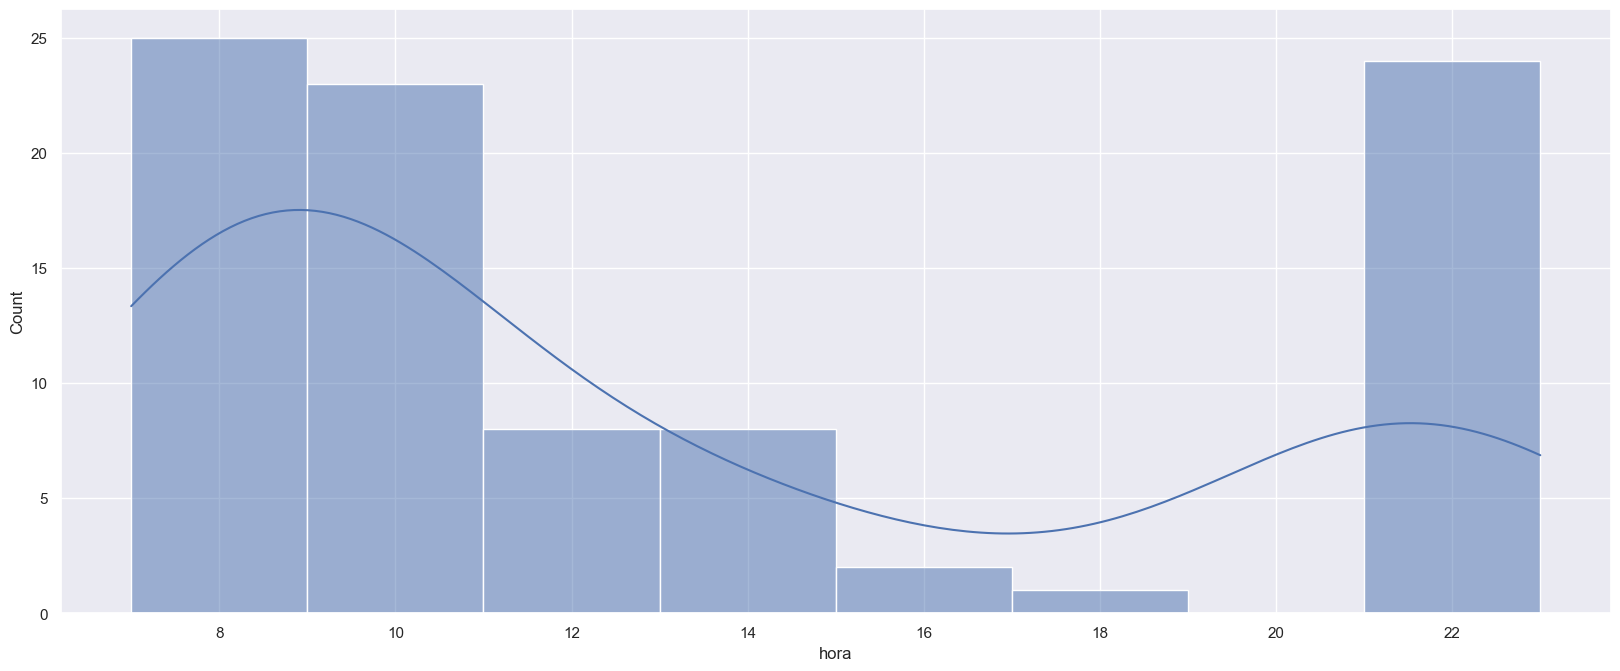

In [3]:
# plt.subplot(121)
# Por hora
sns.histplot(kde=True, x = res['hora'])
# Por dia
# plt.subplot(122)
# sns.scatterplot(x = res['dia'], y=res['dia'].count())


# Quem responde?

,total
0,140
1,93


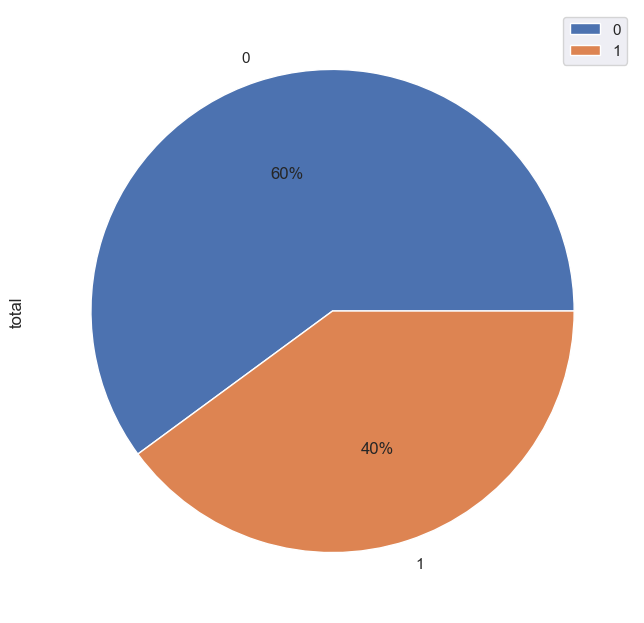

In [103]:
alunos = pd.DataFrame({'total':[140,93]}) #,'respondem':[93]
alunos.plot.pie(autopct="%.0f%%",subplots = True);
alunos

array([<AxesSubplot:ylabel='None'>], dtype=object)

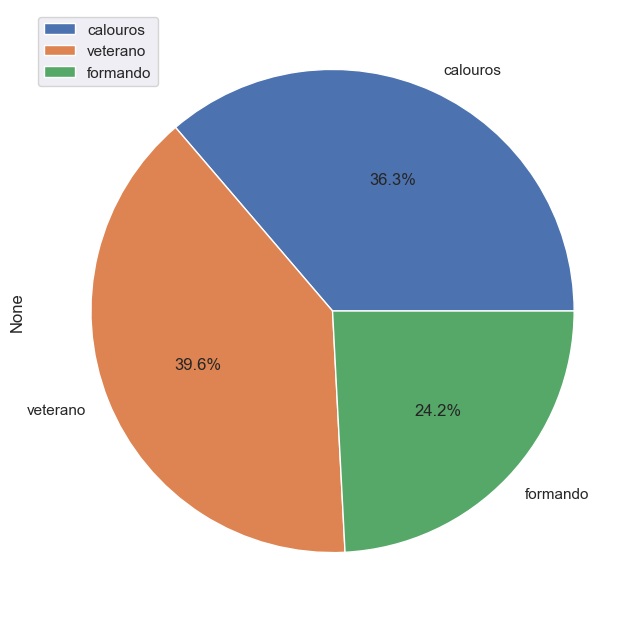

In [117]:
res[['calouros','veterano','formando']].sum().plot.pie(autopct="%.1f%%",subplots=True,legend=True)

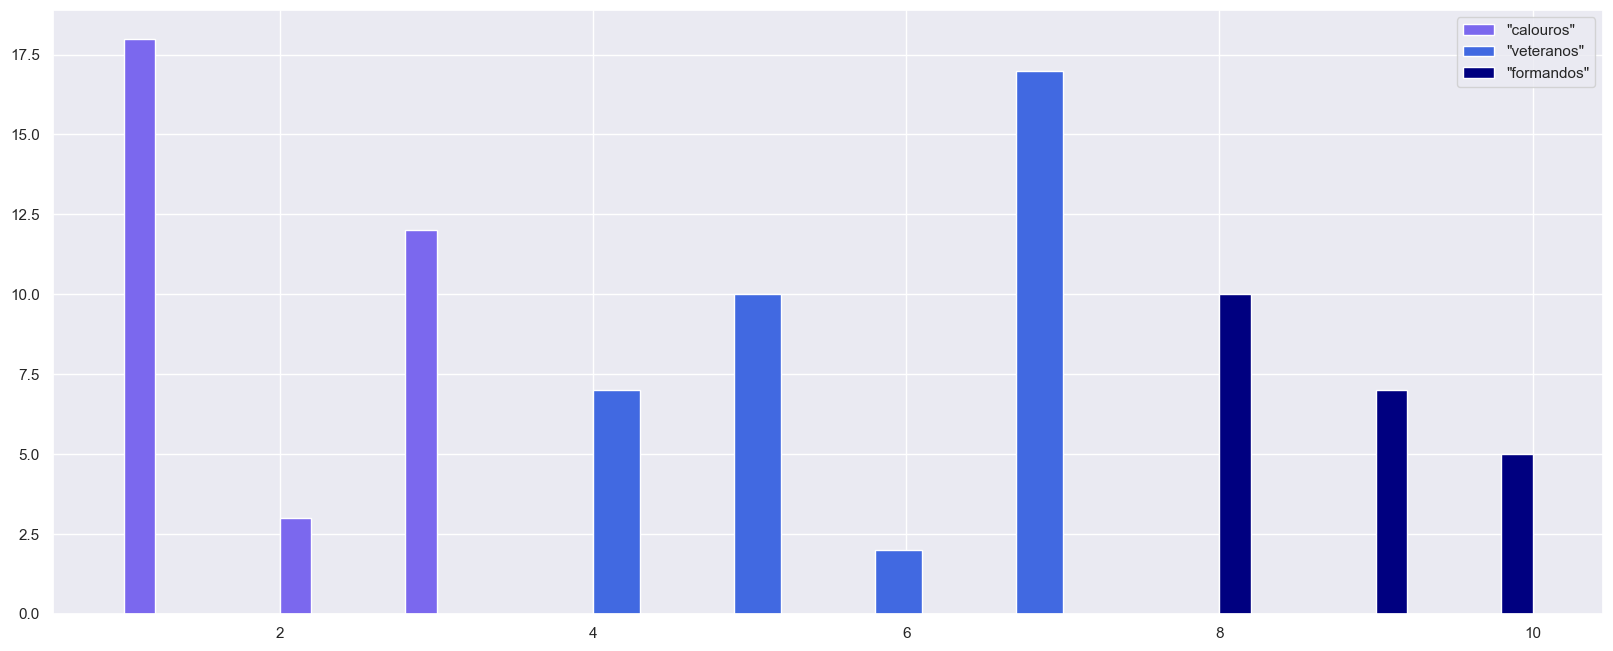

In [86]:

calouros = res.loc[res['3']<=3] # abaixo do 3o periodo "calouro"
veterano = res.loc[res['3']<=7]
veterano = veterano.drop(res.loc[res['3']<=3].index)
formando = res.loc[res['3']>7]

res['calouros'] = np.where(res['3']<=3,1,0)
res['veterano'] = np.where((res['3']<=7) & (res['3']>3),1,0)
res['formando'] = np.where(res['3']>7,1,0)

plt.plot()
res.loc[res['calouros'] ==1]['3'].hist(color='mediumslateblue')
res.loc[res['veterano'] ==1]['3'].hist(color='royalblue')
res.loc[res['formando'] ==1]['3'].hist(color='navy')

plt.legend(['"calouros"','"veteranos"','"formandos"'])

In [136]:
print(perguntas.iloc[16].values)
# sns.histplot(kde=True,y = res.loc[res['veterano']==1]['17'], fill=True)
res.loc[res['veterano']==1]['17'].sum()

['Em relação a esse direcionamento dado pelo departamento, quanto ele te motiva?']


0

C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='19', ylabel='Count'>

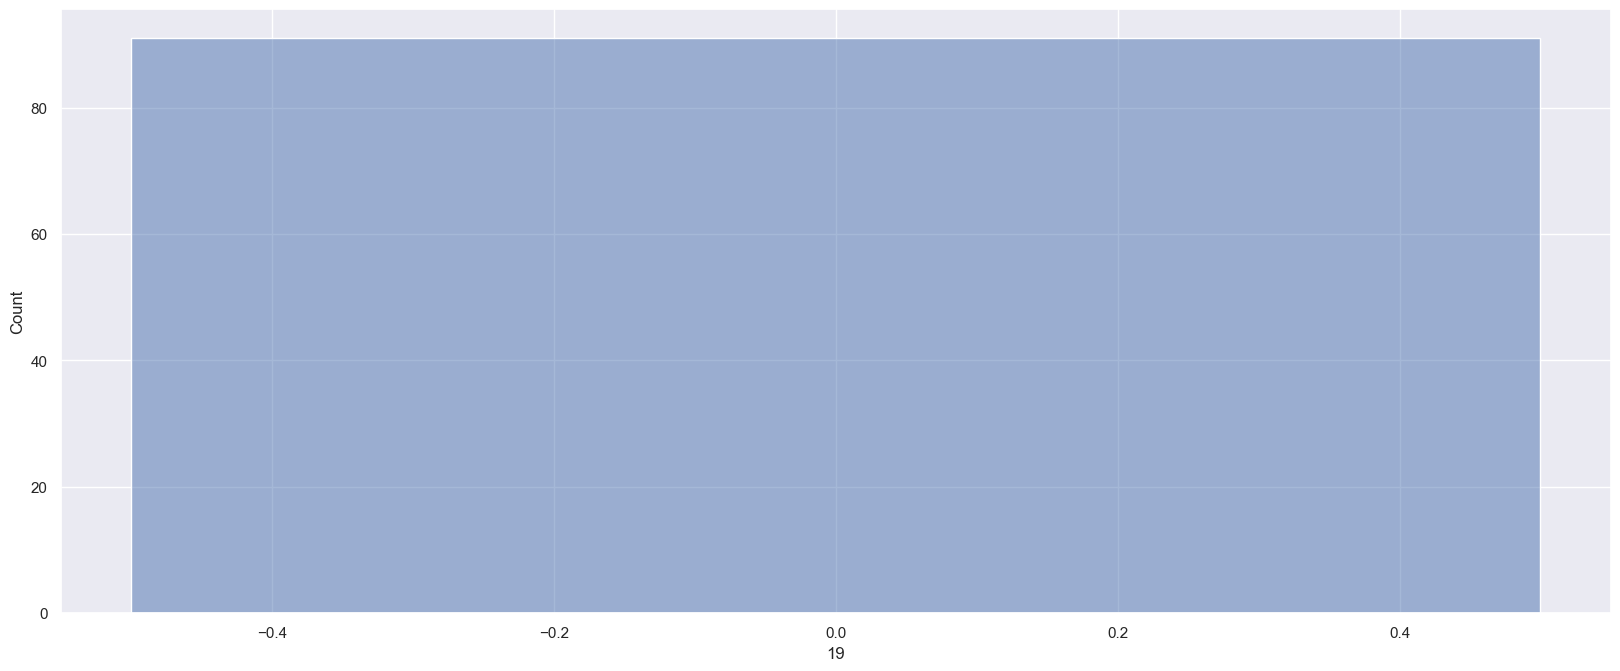

In [5]:
sns.histplot(kde=True,x = res.iloc[:,17], fill=True)
# Quanto às avaliações:

TypeError: could not convert string to float: 'Gostaria de levantar um ponto a ser pensado sobre a primeira proposição. Acredito que num cenário ideal, o objetivo poderia ser atingido. Porém é necessário levar em consideração que os períodos dos alunos da ELT tem um grande carga horária, demanda de outras matérias, somados a projetos extracurriculares, fazendo com que quase ninguém tenha tempo, fazendo períodos muito exaustivos. Aumentar o trabalho ou horas necessárias pra conseguir fazer uma matéria pode gerar um efeito contrário, onde o aluno não fará ela “namoral”. Então é preciso pensar na nossa realidade, que infelizmente pode não corresponder com a proposição. Mas isso é apenas um questionamento'

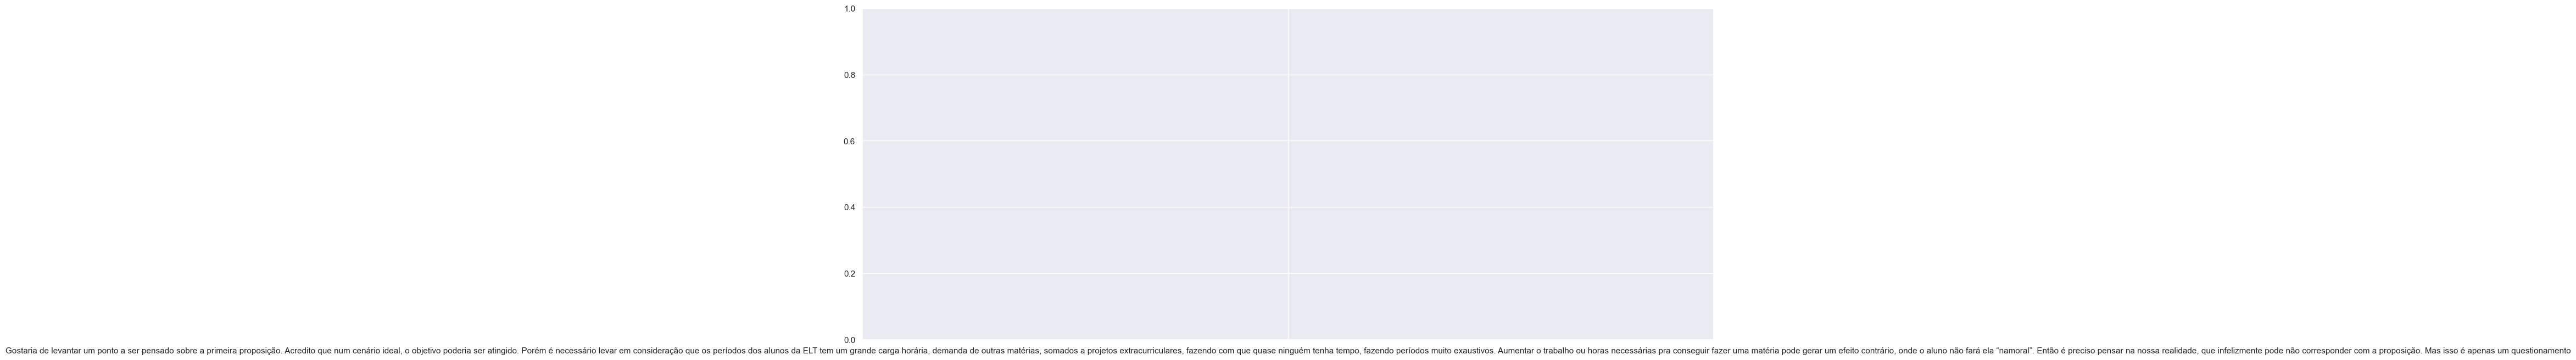

In [6]:
sns.histplot(kde=True,x = res.iloc[:,18], fill=True)
# Projs praticos

In [ ]:
# print(res.columns[2])
res['periodo'] = res.iloc[:,2]
res['direcionado'] = res.iloc[:,3]

# respostaSim2 = res.groupby(by= 'direcionado').count()
porPeriodo = res.groupby(by= 'periodo').sum()

# respostaSim2.head()
porPeriodo

# print(resposta2.iloc[:,2])
# sns.histplot(y=porPeriodo['direcionado'], x= porPeriodo.index)

,2,3,4,5,7,8,9,11,12,13,14,16,17,18,19,dia,hora,min,direcionado
periodo,,,,,,,,,,,,,,,,,,,
1,46455,23,13,18,14,13,14,18,23,13,19,9,0,0,0,651,288,288,13
2,6059,6,2,1,2,2,2,2,3,3,2,2,0,0,0,91,52,52,2
3,24236,36,5,6,8,3,4,6,11,10,8,3,0,0,0,366,191,191,5
4,14133,28,1,6,4,2,3,6,7,0,4,3,0,0,0,215,89,89,1
5,20182,50,3,8,10,2,8,6,10,2,7,2,0,0,0,307,126,126,3
6,4036,12,1,1,2,1,1,2,2,1,2,0,0,0,0,62,16,16,1
7,34292,119,8,10,16,9,10,12,15,8,15,1,0,0,0,523,193,193,8
8,20164,80,4,6,8,4,5,8,8,7,8,0,0,0,0,309,111,111,4
9,14115,63,2,5,6,0,6,4,7,3,6,0,0,0,0,213,119,119,2


<AxesSubplot:xlabel='4', ylabel='3'>

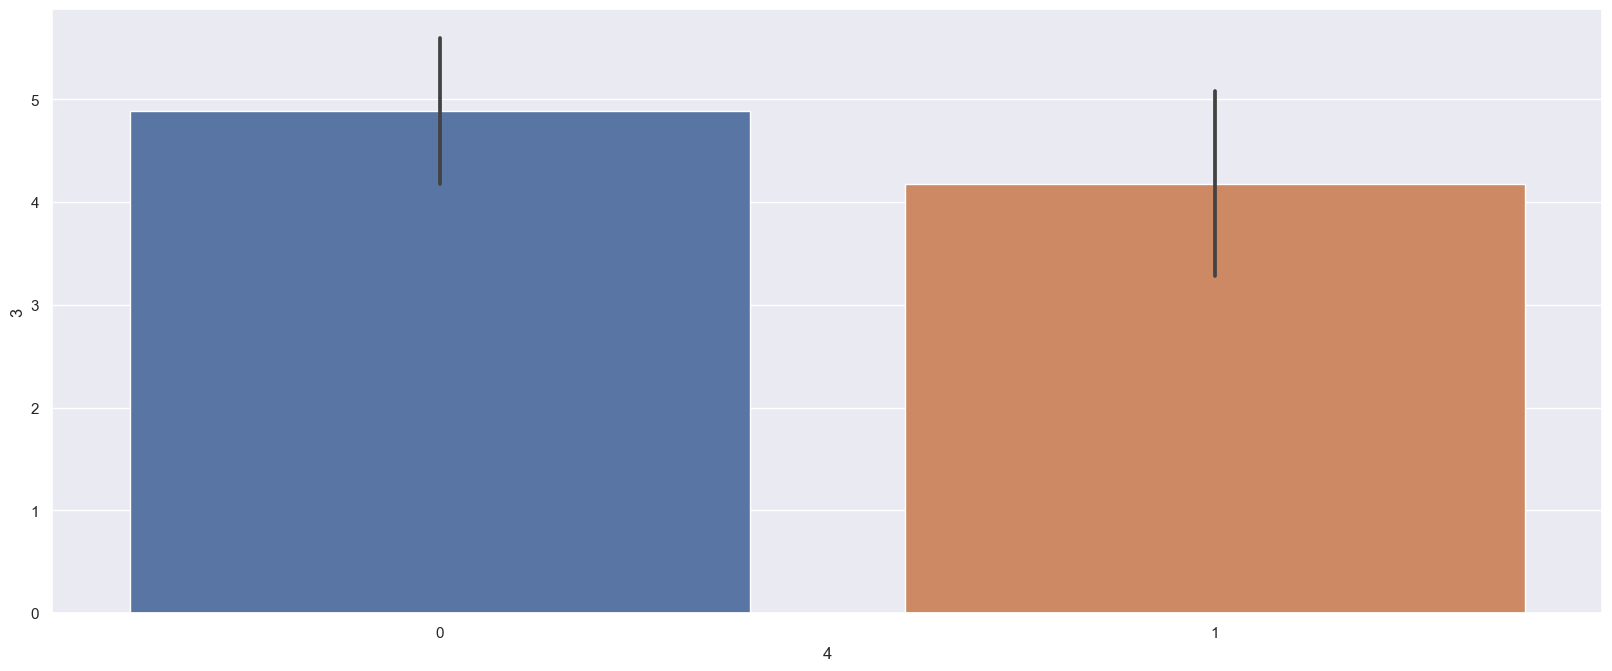

In [ ]:
sns.barplot( x = res.iloc[:,2], y = res.iloc[:,1])
# print(perguntas[1].values)

In [137]:
perguntas

,pergunta
id,
0,Endereço de e-mail
1,Em qual ano você entrou na ELT?
2,A maioria das matérias que você está cursando ...
3,As orientações dos professores te direcionam p...
4,Gostaria de ter avaliações mais frequentes?
5,Comentários pertinentes a esse contexto:
6,"Em geral, os experimentos práticos em laborató..."
7,Há estímulo ou motivação suficiente da metodol...
8,"Você é capaz de abstrair, na maioria das práti..."


In [176]:
# mask_ut=np.triu(np.ones(res.corr().shape)).astype(np.bool)
# sns.heatmap(res.corr(), mask=mask_ut, cmap="Spectral")


Text(0.5, 0, 'Período')

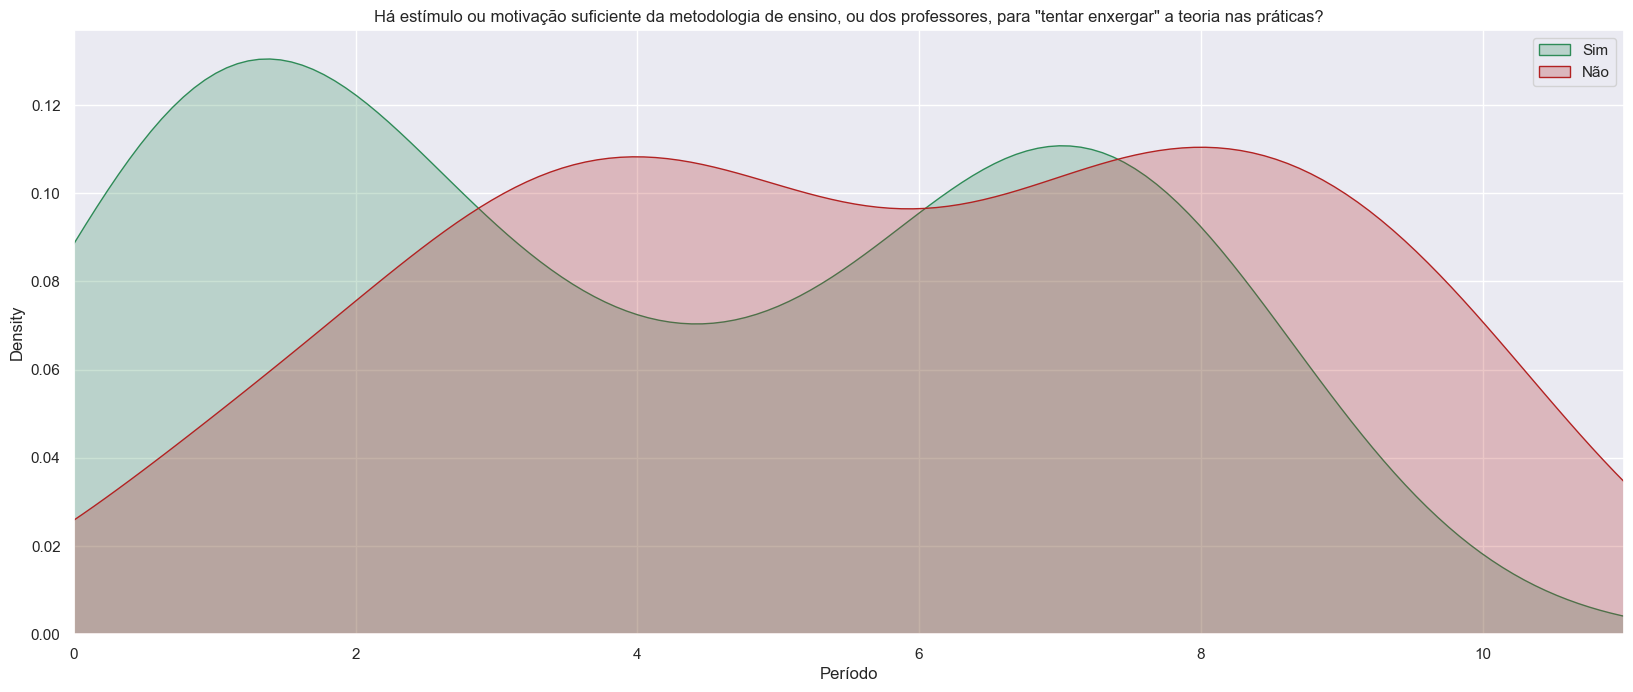

In [185]:
sns.kdeplot(x = res.loc[res['8']==1]['3'], fill=True, color='seagreen')
sns.kdeplot( x = res.loc[res['8']==0]['3'], fill=True, color='firebrick')
plt.legend(['Sim','Não'])
plt.title(perguntas['pergunta'][7])
plt.xlim([0,11])
plt.xlabel('Período')

In [ ]:
sns.barplot(x = res.loc[res['5']==1]['3'], fill=True, color='seagreen')
sns.kdeplot( x = res.loc[res['5']==0]['3'], fill=True, color='firebrick')
plt.legend(['Sim','Não'])
plt.title(perguntas['pergunta'][4])
plt.xlim([0,11])
plt.xlabel('Período')

Text(0.5, 0, 'Período')

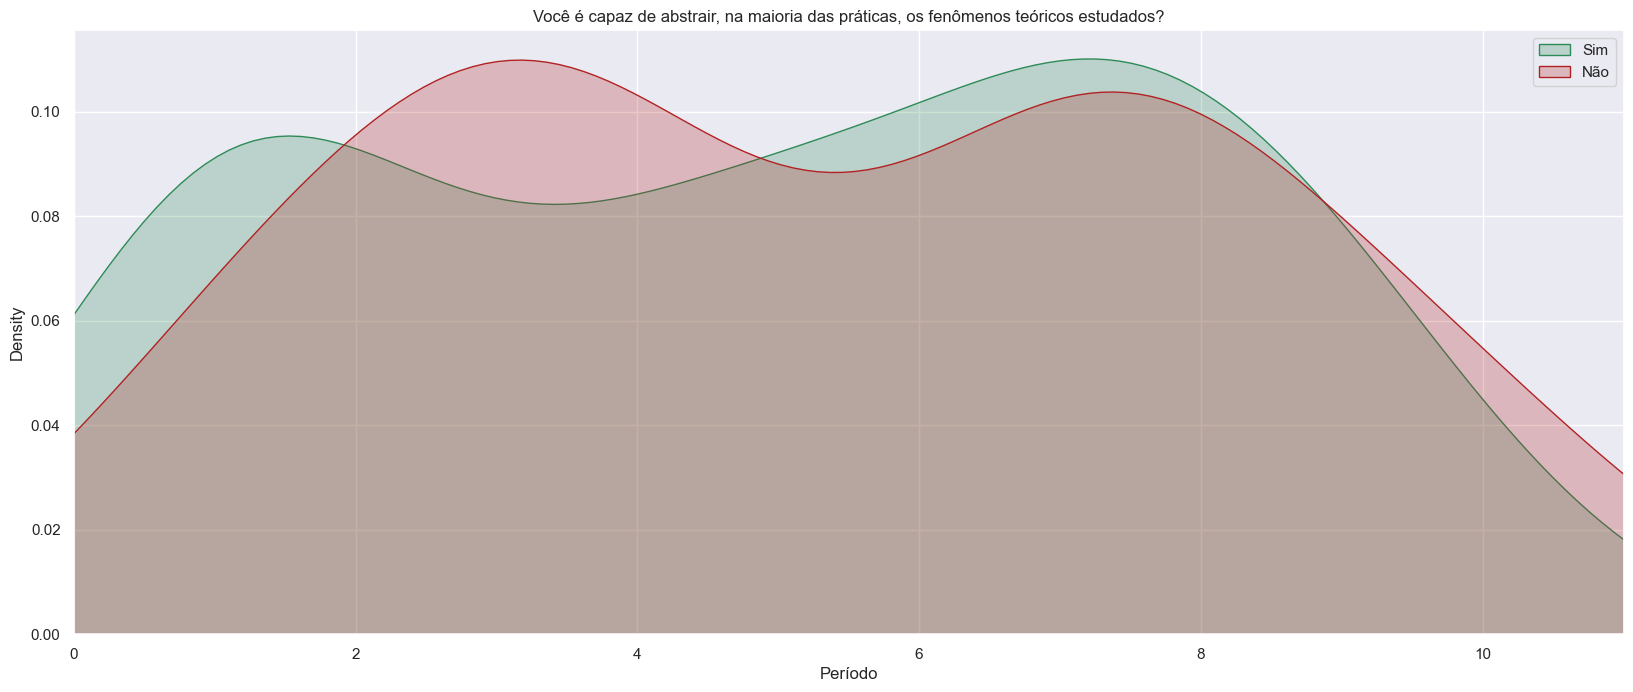

In [165]:
# sns.histplot(kde=True, x = res['3'], hue = res['9'], fill=True)
# plt.legend(['Não','Sim'])
# plt.title(perguntas['pergunta'][8])
# plt.xlim([1,10])

# plt.subplot(121)
# sns.histplot(kde=True, x = res.loc[res['9']==1]['3'], fill=True, color='palegreen')
sns.kdeplot(x = res.loc[res['9']==1]['3'], fill=True, color='seagreen')
# sns.histplot(x = res.loc[res['9']==1]['3'], fill=True, color='seagreen')
# plt.title(perguntas['pergunta'][8])
# plt.legend(['Sim'])
# plt.xlim([1,10])
# plt.xlabel('Período')

# plt.subplot(122)
# sns.histplot(kde=True, x = res.loc[res['9']==0]['3'], fill=True, color='firebrick')
sns.kdeplot( x = res.loc[res['9']==0]['3'], fill=True, color='firebrick')
# sns.histplot( x = res.loc[res['9']==0]['3'], fill=True, color='firebrick')
plt.legend(['Sim','Não'])
plt.title(perguntas['pergunta'][8])
plt.xlim([0,11])
plt.xlabel('Período')

<AxesSubplot:xlabel='4', ylabel='3'>

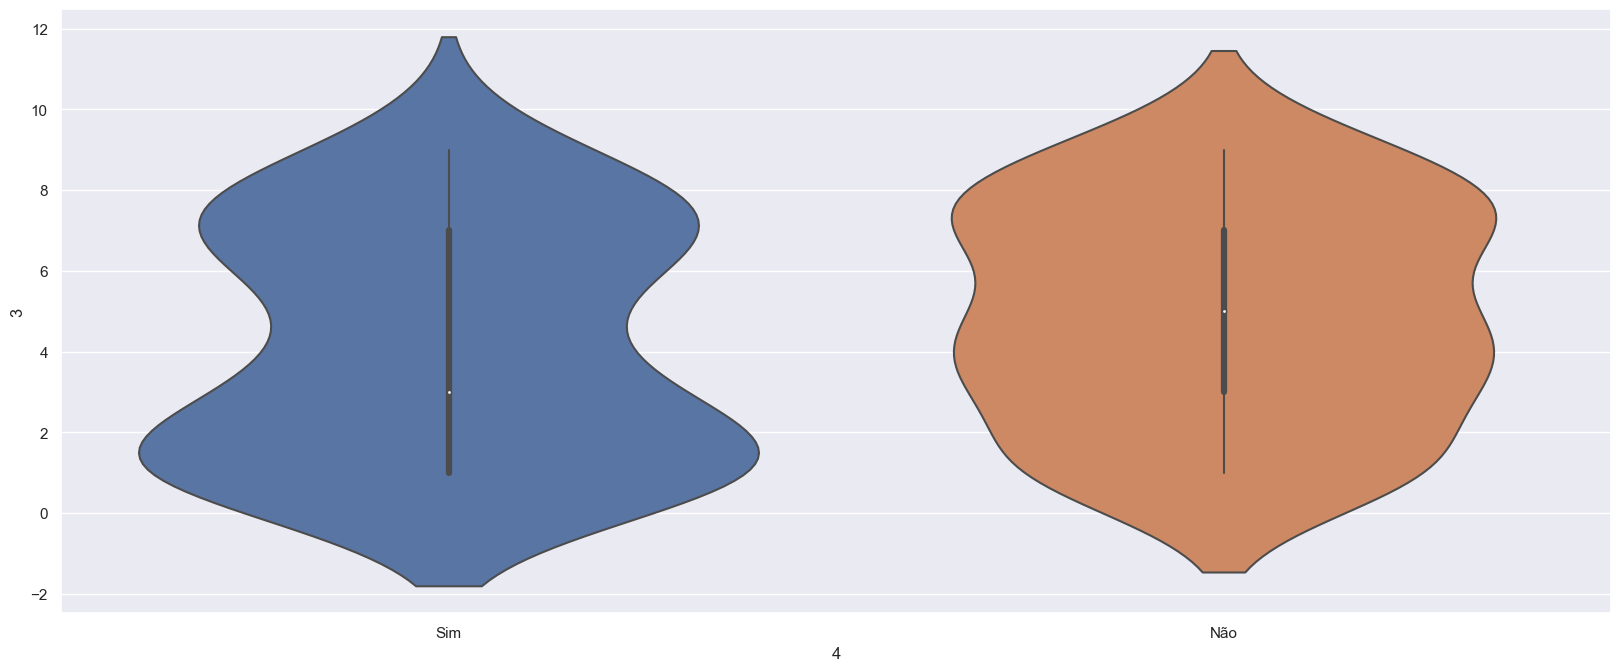

In [ ]:
sns.violinplot( x = res.iloc[:,3], y = res.iloc[:,2])
sns.scatterplot(x = res.iloc[:,3], y = res.iloc[:,2], )

# 